Let's get some more practice visualizing filters.

1) Repeat the activation visualization (5.4.1) but for a dog image.  Compare to the cat activations.  Any interesting differences, especially in the last layer?

2) Visualize the filters (using the methods from 5.4.2) for the cat/dog model

3) Run the attached image through the cat/dog categorization.  Does it categorize correctly?  Make a heatmap showing which areas of the image contributed (5.4.3)


In [1]:
import os, shutil

In [5]:
pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.9/site-packages
Requires: absl-py, google-pasta, opt-einsum, wheel, tensorboard, grpcio, wrapt, gast, tensorflow-estimator, termcolor, flatbuffers, protobuf, typing-extensions, h5py, numpy, astunparse, keras-preprocessing, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install keras==2.4.3
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /opt/conda/lib/python3.9/site-packages
Requires: h5py, numpy, scipy, pyyaml
Required-by: 


In [13]:
from keras import layers
from keras import models
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing import image 
import os
import numpy as np
from keras.models import load_model 
from keras.applications import VGG16 
from keras import backend as K
import tensorflow as tf 


In [14]:
# proprossesing a single image 
img_path = '/home/ubuntu/deep_learning_with_python/_MG_2350.jpg'

from keras.preprocessing import image 
import numpy as np

img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


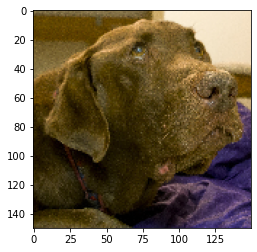

In [15]:
# display the picture 
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0]) 
plt.show()

In [17]:
# visualize what convnet learn 
# visualize intermediate activations: useful for understanding how successive convnet layers transform their input, 
# and for getting a first idea of the meaning of invidividual convnet filters 

# load the model saved in section 5.2
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

2021-09-01 21:14:17.445803: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# instantiating a model from an input tensor and a list of output tensors 
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] # extract output of the top 8 layers 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
# creates a model that will return these outputs, given the model input 

In [20]:
# running the model in predict mode 
activations = activation_model.predict(img_tensor) 
# returns a list of eight numpy arrays, one array per layer activation


2021-09-01 21:14:48.292989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-01 21:14:48.311182: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300035000 Hz


In [21]:
# this is the activation of the first convolution layer for the cat image input 
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


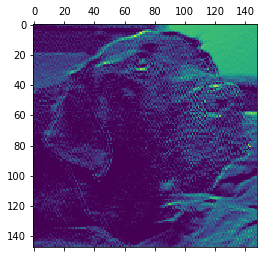

In [22]:
# visualize the fourth channel 
import matplotlib.pyplot as plt 
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

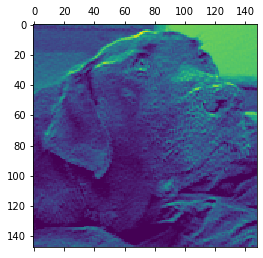

In [23]:
# seventh channel 
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

In [25]:
# visualizing every channel in every intermediate activation 
# name of the layers, so you can have them as part of your plot 

In [26]:
activations[1].shape

(1, 74, 74, 32)

/tmp/ipykernel_2088/3130986806.py:21: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


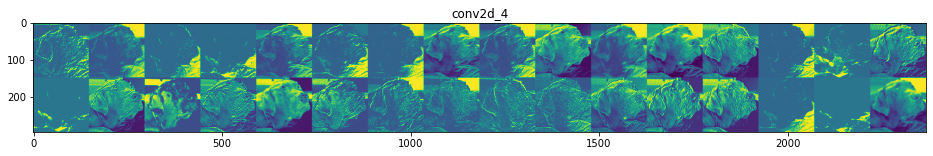

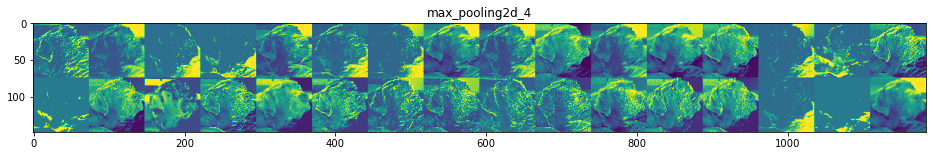

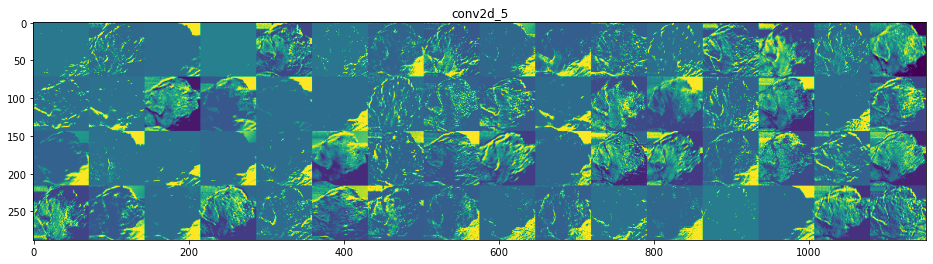

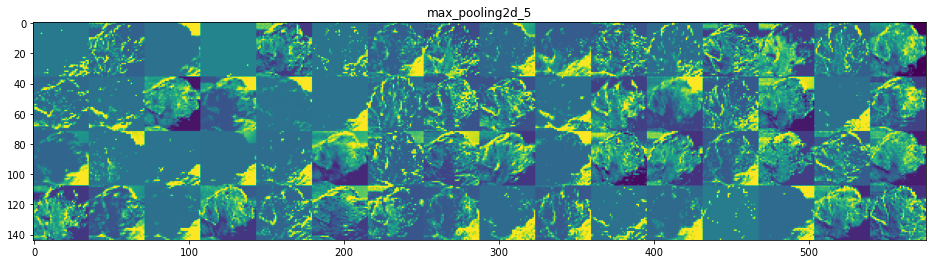

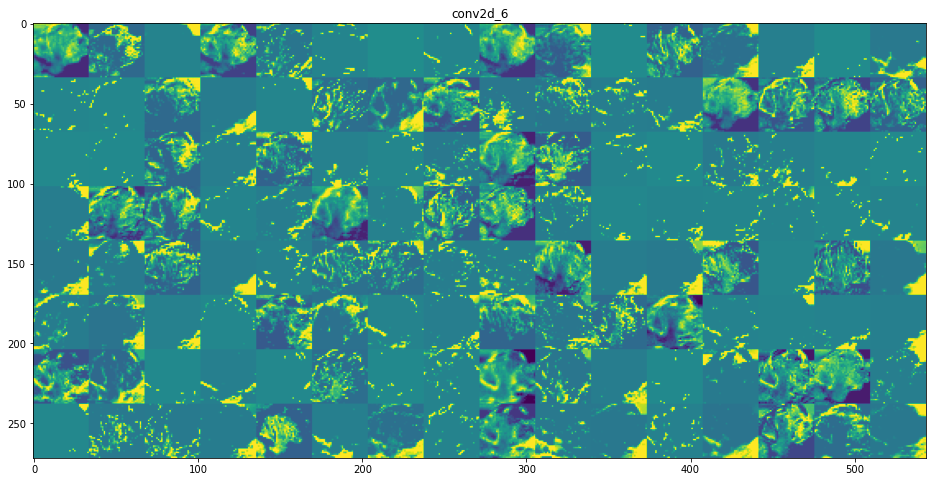

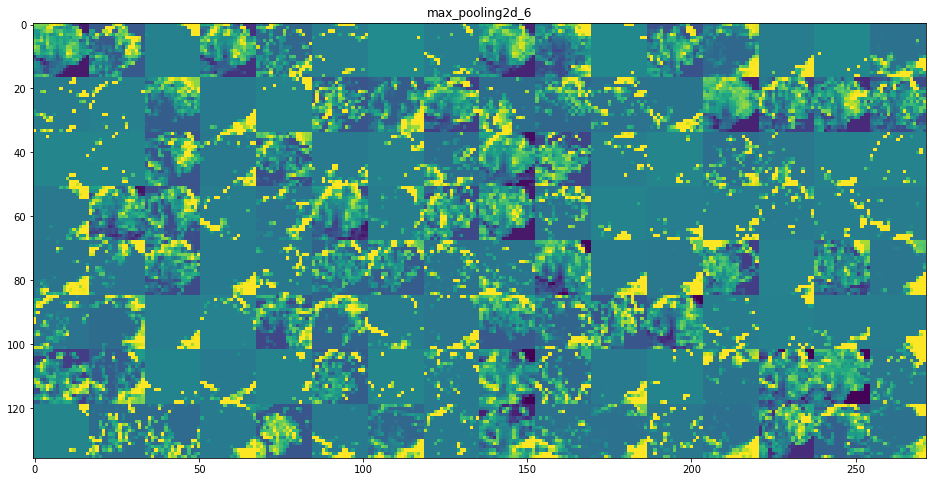

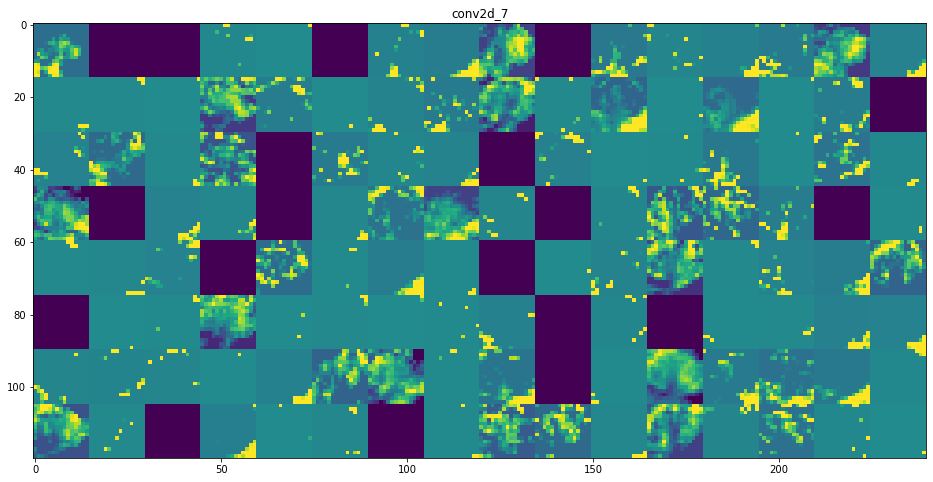

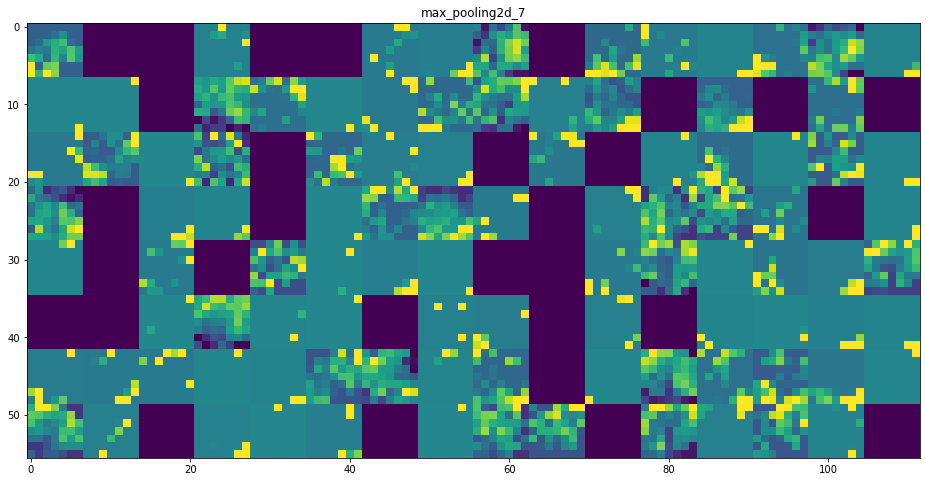

In [27]:
layer_names = []
for layer in model.layers[:8]: # the 1st 8 layers 
    layer_names.append(layer.name) 
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # number of features in the feature map, slice the last   
    
    size = layer_activation.shape[1] # the feature map has shape (I, size, size, n_feature)
    
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row] 
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0])) 
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

by the last layer cat and dog look pretty similar and would be hard to tell apart 

each layer in convnet learns a collection of filters such that their inputs can be expressed as a combination of the filters. The filters in these convnet filter banks get increasingly complex and refined as you go higher in the model. 

In [30]:
# 3) visualize the heatmaps of class activation 
model = VGG16(weights='imagenet') 


In [31]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions 
import numpy as np

img_path = '/home/ubuntu/deep_learning_with_python/_MG_2350.jpg' 
img = image.load_img(img_path, target_size=(224, 224)) # python imaging library image of size 224 X 224
x = image.img_to_array(img) # float32 Numpy array of shape 
x = np.expand_dims(x, axis=0) # add a dimension to transform the array into a batch of size (1,224,224,3)
x = preprocess_input(x) # preprocess the batch (this does channel-wise color normalization) 


In [32]:
# run the pretrained network on the image and decode its prediction vector back to a human-readable format 
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

/opt/conda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02099849', 'Chesapeake_Bay_retriever', 0.71235514), ('n02100583', 'vizsla', 0.16802037), ('n02092339', 'Weimaraner', 0.04649216)]


In [ ]:
# the top 3 classes predicted for this image are as follows 
# Chesapeake_Bay_retriever 71%
# vizsla 17%
# Weimaraner 4%

In [33]:
np.argmax(preds[0]) # index 209 was maximally activated 

209

In [34]:
# setup the Grad-CAM algorithm 
Chesapeake_Bay_retriever_output = model.output[:, 209] # Chesapeake_Bay_retriever entry in the prediction vector 
last_conv_layer = model.get_layer('block5_conv3') # ouptut feature map of the last convolutional layer in VGG16
grads = K.gradients(Chesapeake_Bay_retriever_output, last_conv_layer.output)[0] 
# gradient of the "Chesapeake_Bay_retriever" class with regard to the output feature map of block5_conv3
pooled_grads = K.mean(grads, axis=(0, 1, 2)) 
iterate = K.function([model.input],
                    [pooled_grads, last_conv_layer.output[0]]) 
# lets you access the values of the quantities you just defined: pooled_grads and the output feature map of 
# block5_conv3, given a sample image 

pooled_grads_value, conv_layer_output_value = iterate([x]) 
# values of these two quantifies, as numpy array, given the sample image 

for i in range(512): 
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
# multiply each channel in the feature-map aray by "how important this channel is" with regard to the 
# "Chesapeake_Bay_retriever" class 
    
    heatmap = np.mean(conv_layer_output_value, axis=-1) 
    # this channel-wise mean of the resulting feature map is the heatmap of the class activation 

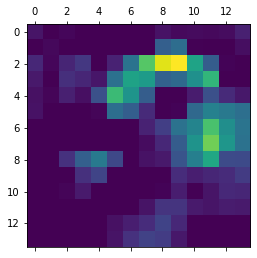

In [35]:
# heatmap post-processing 
heatmap = np.maximum(heatmap, 0) 
heatmap /= np.max(heatmap) 
plt.matshow(heatmap)

In [37]:
!pip install opencv-python

     |████████████████████████████████| 49.9 MB 14 kB/s s eta 0:00:01


In [38]:
# superimpose the heatmap with the original dag picture 
import cv2 

img = cv2.imread(img_path) # Uses cv2 to load the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0])) # resize the image to be the same size the original image
heatmap = np.uint8(255 * heatmap) # convet the heatmap to RGB 
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) # apply the heatmap to the original image 
superimposed_img = heatmap * 0.4 + img # 0.4 here is the heatmap intensity factor 
cv2.imwrite('/home/ubuntu/deep_learning_with_python/_MG_2350_heatmap.jpg', superimposed_img) # save the image to disk 


True